<a href="https://colab.research.google.com/github/elyorakhmat/ML_journey/blob/main/clustering_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical clustering practice
# Purpose: to cluster car models by their particular features.

# Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Dataset loading and analyzing

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv"
df = pd.read_csv(url)
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


In [ ]:
df.isna().sum()

,0
manufact,2
model,0
sales,0
resale,0
type,0
price,0
engine_s,0
horsepow,0
wheelbas,0
width,0


In [ ]:
df['type'].value_counts()

,count
type,
0.000,116
1.000,41
$null$,2


In [ ]:
df['partition'].value_counts()

,count
partition,
0.0,157
1.0,2


# Data preprocessing

In [ ]:
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [ ]:
# droping partition col
df.drop('partition', axis= 1, inplace= True)

In [ ]:
# converting categorical values to numeric
cols = df.drop(columns= ['manufact', 'model']).columns

df[cols] = df[cols].apply(pd.to_numeric, errors= 'coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   manufact  157 non-null    object 
 1   model     159 non-null    object 
 2   sales     157 non-null    float64
 3   resale    121 non-null    float64
 4   type      157 non-null    float64
 5   price     157 non-null    float64
 6   engine_s  158 non-null    float64
 7   horsepow  158 non-null    float64
 8   wheelbas  158 non-null    float64
 9   width     158 non-null    float64
 10  length    158 non-null    float64
 11  curb_wgt  157 non-null    float64
 12  fuel_cap  158 non-null    float64
 13  mpg       156 non-null    float64
 14  lnsales   157 non-null    float64
dtypes: float64(13), object(2)
memory usage: 18.8+ KB


In [ ]:
# checking duplicated values
df.duplicated().sum()

np.int64(0)

In [ ]:
# droping NaN values
df.dropna(inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 149
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   manufact  117 non-null    object 
 1   model     117 non-null    object 
 2   sales     117 non-null    float64
 3   resale    117 non-null    float64
 4   type      117 non-null    float64
 5   price     117 non-null    float64
 6   engine_s  117 non-null    float64
 7   horsepow  117 non-null    float64
 8   wheelbas  117 non-null    float64
 9   width     117 non-null    float64
 10  length    117 non-null    float64
 11  curb_wgt  117 non-null    float64
 12  fuel_cap  117 non-null    float64
 13  mpg       117 non-null    float64
 14  lnsales   117 non-null    float64
dtypes: float64(13), object(2)
memory usage: 14.6+ KB


In [ ]:
df.describe()

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,59.112316,18.031538,0.247863,25.969487,3.048718,181.282051,107.326496,71.189744,187.717949,3.324051,17.812821,24.117949,3.401179
std,75.058933,11.605632,0.433629,14.149699,1.055169,58.591786,8.050588,3.530151,13.849926,0.597177,3.794609,4.404164,1.337862
min,0.110000,5.160000,0.000000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,-2.207000
25%,16.767000,11.240000,0.000000,16.980000,2.200000,140.000000,102.400000,68.500000,177.500000,2.911000,15.300000,22.000000,2.819000
50%,32.299000,14.010000,0.000000,21.665000,3.000000,175.000000,107.000000,70.400000,187.800000,3.340000,17.200000,24.000000,3.475000
75%,76.029000,19.875000,0.000000,29.465000,3.800000,210.000000,111.600000,73.600000,196.500000,3.823000,19.800000,26.000000,4.331000
max,540.561000,67.550000,1.000000,82.600000,8.000000,450.000000,138.700000,79.300000,224.500000,5.115000,32.000000,45.000000,6.293000


In [ ]:
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673
3,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150
4,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015
5,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933


## Visual analysis (fixing outliers)

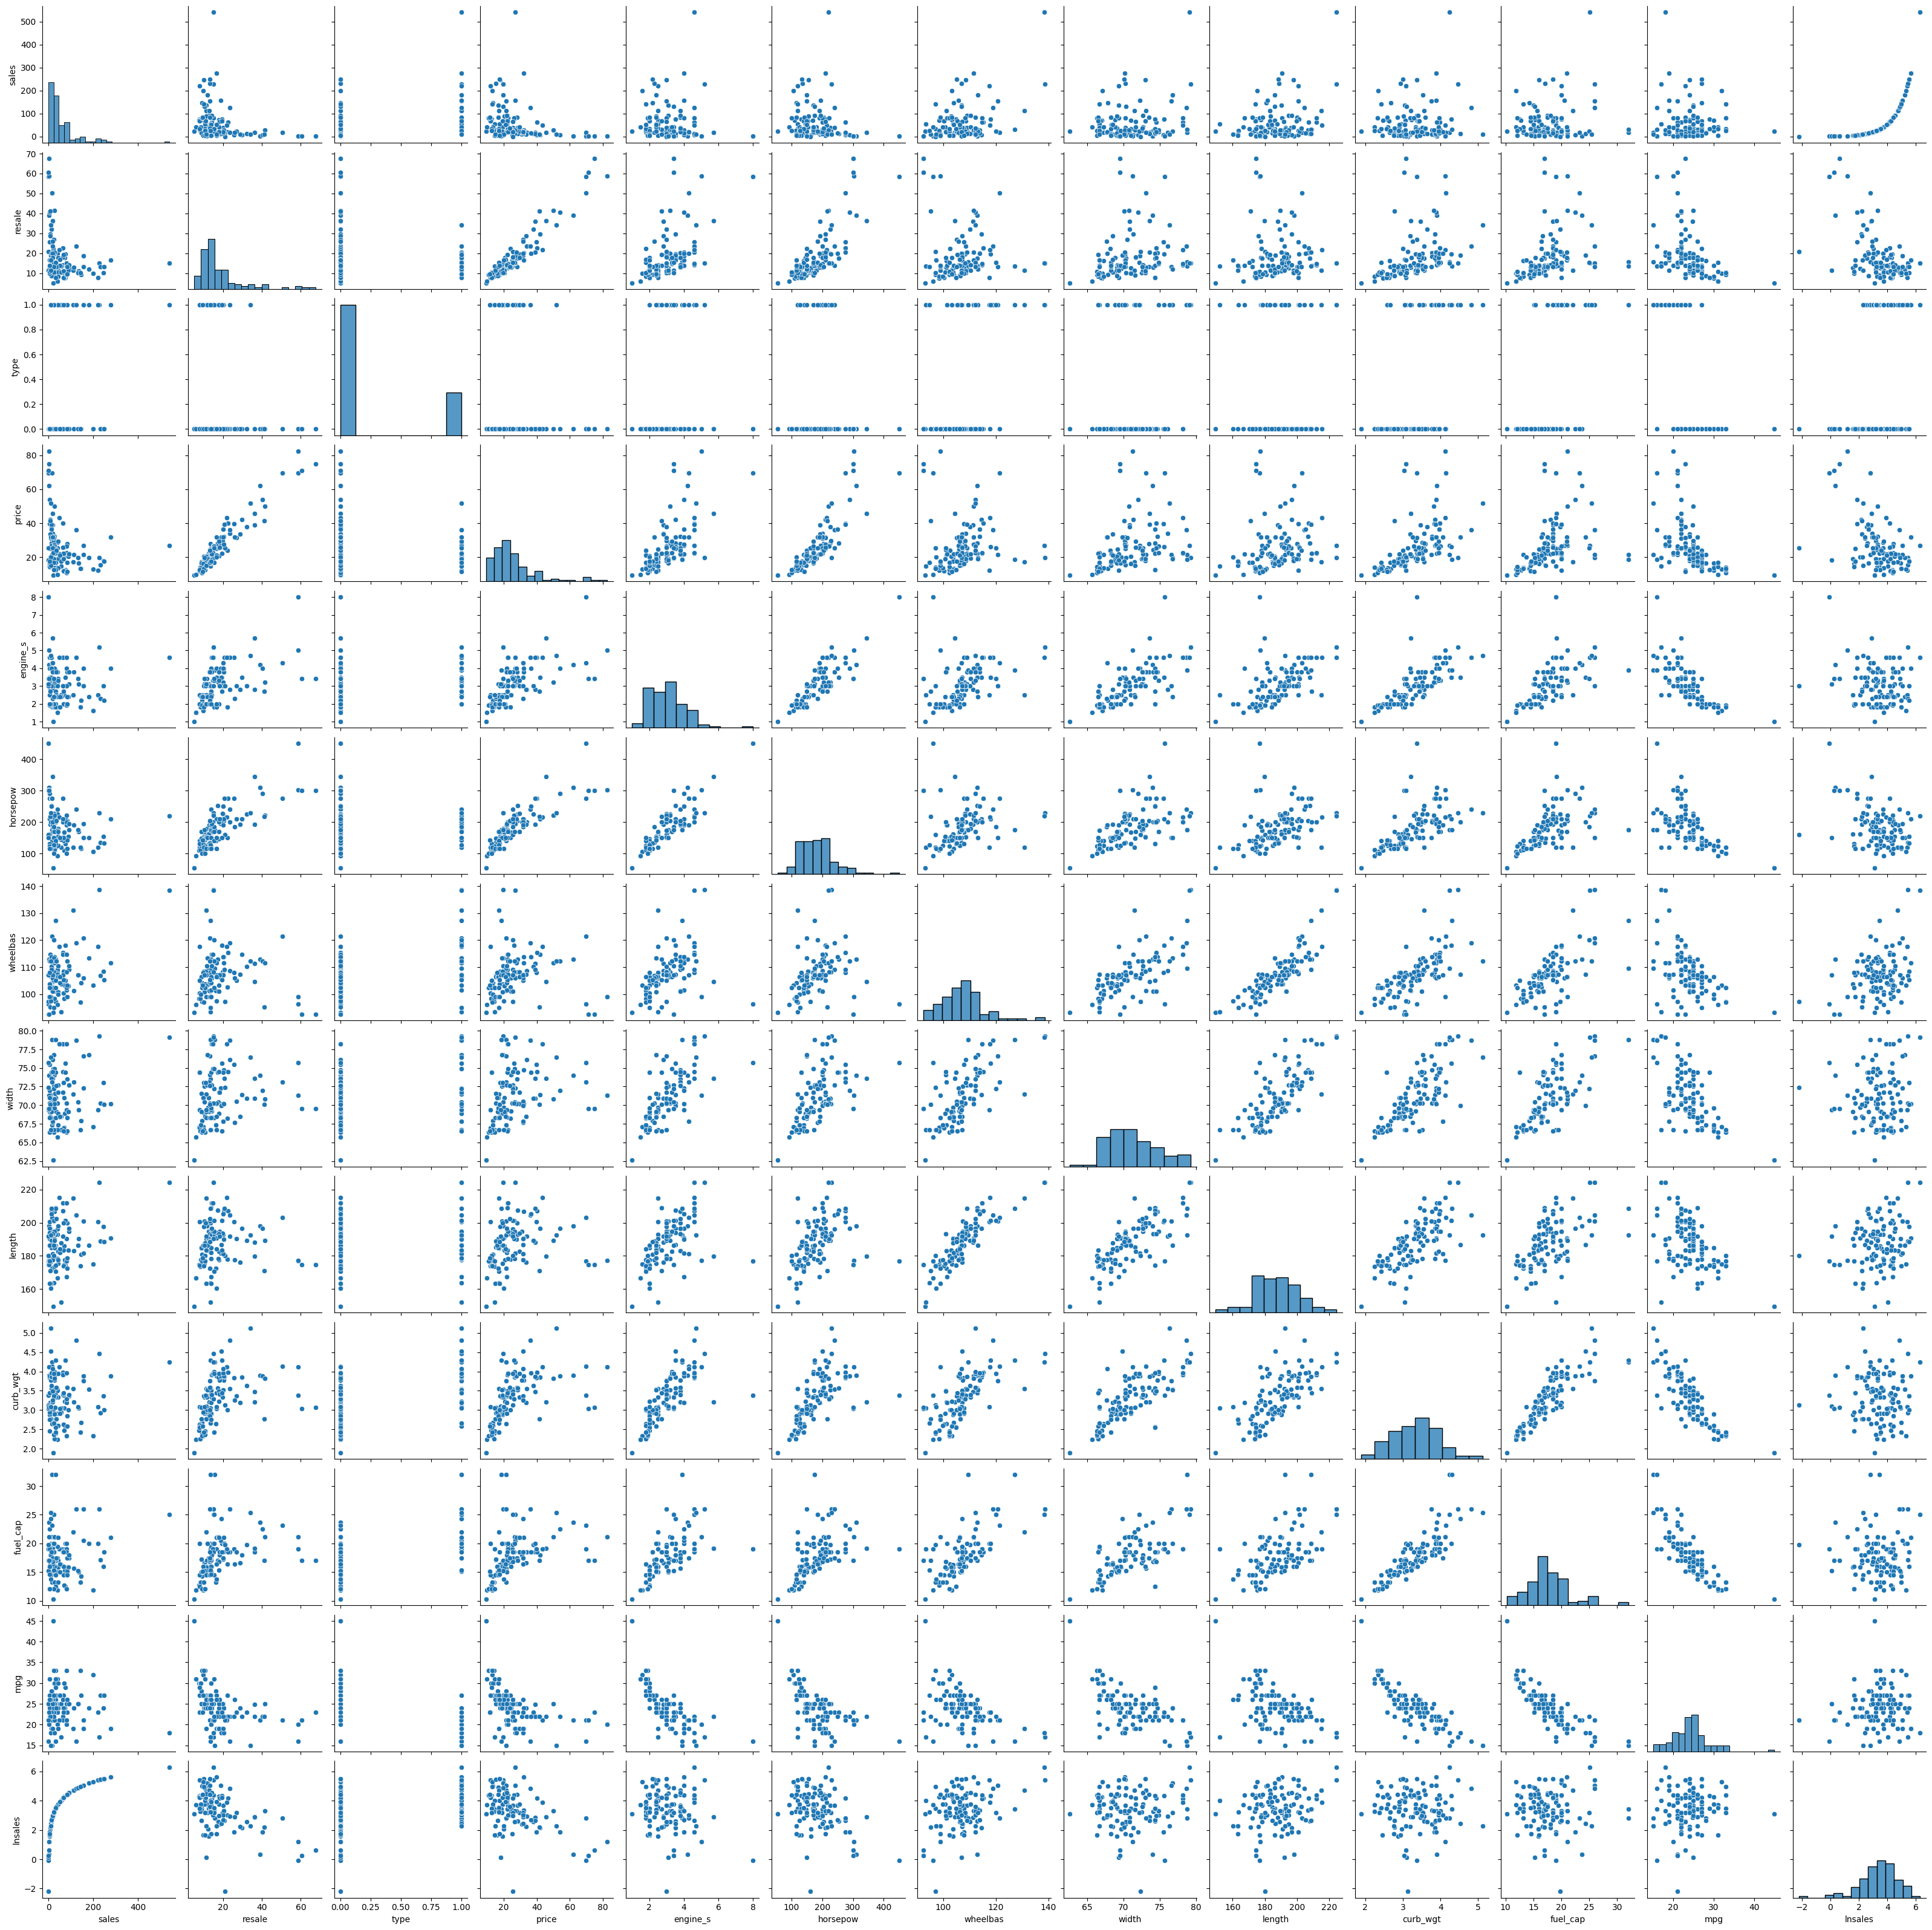

In [ ]:
sns.pairplot(df)
plt.show()

### sales

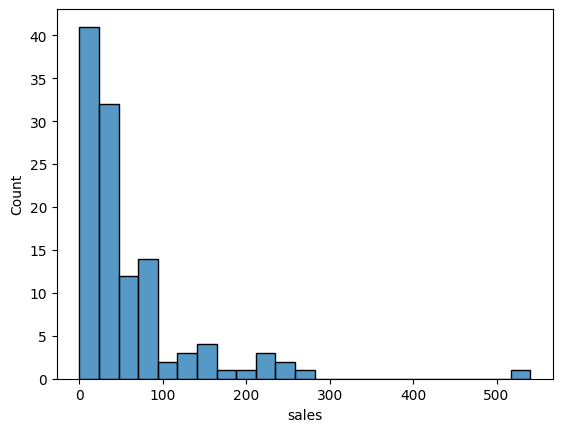

In [ ]:
sns.histplot(x= df['sales'])
plt.show()

In [ ]:
df[df['sales'] > 300]

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales
46,Ford,F-Series,540.561,15.075,1.0,26.935,4.6,220.0,138.5,79.1,224.5,4.241,25.1,18.0,6.293


In [ ]:
df.drop(index= 46, inplace= True)

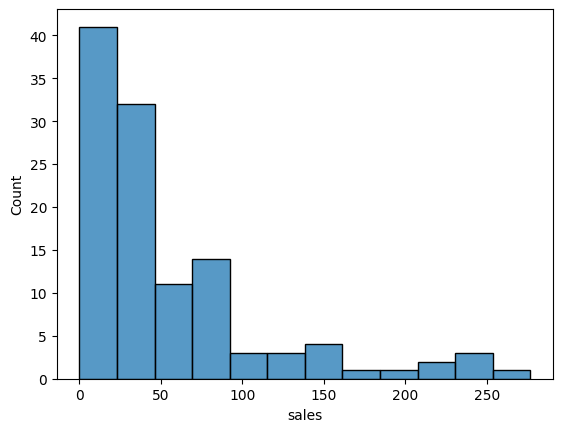

In [ ]:
# plotting again
sns.histplot(x= df['sales'])
plt.show()

### mpg

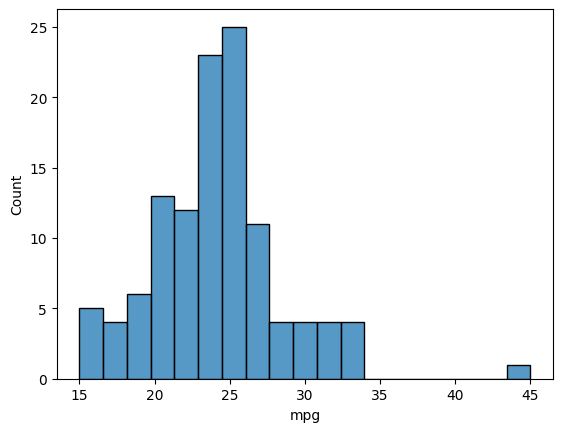

In [ ]:
sns.histplot(x= df['mpg'])
plt.show()

In [ ]:
df[df['mpg'] > 35]

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales
22,Chevrolet,Metro,21.855,5.16,0.0,9.235,1.0,55.0,93.1,62.6,149.4,1.895,10.3,45.0,3.084


In [ ]:
df.drop(index= 22, inplace= True)

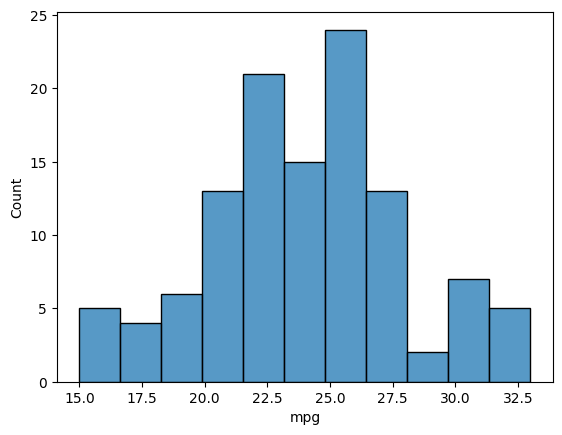

In [ ]:
sns.histplot(x= df['mpg'])
plt.show()

### lnsales

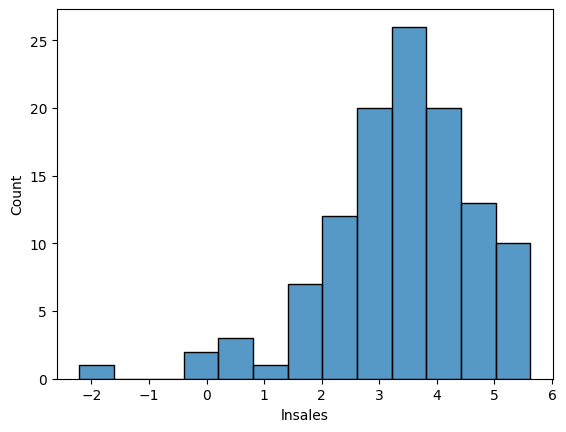

In [ ]:
sns.histplot(x= df['lnsales'])
plt.show()

In [ ]:
df[df['lnsales'] <= 0]

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales
31,Dodge,Viper,0.916,58.47,0.0,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,-0.088
68,Mitsubishi,3000GT,0.110,20.94,0.0,25.450,3.0,161.0,97.2,72.4,180.3,3.131,19.8,21.0,-2.207


In [ ]:
df.drop(index= [31, 68], inplace= True)

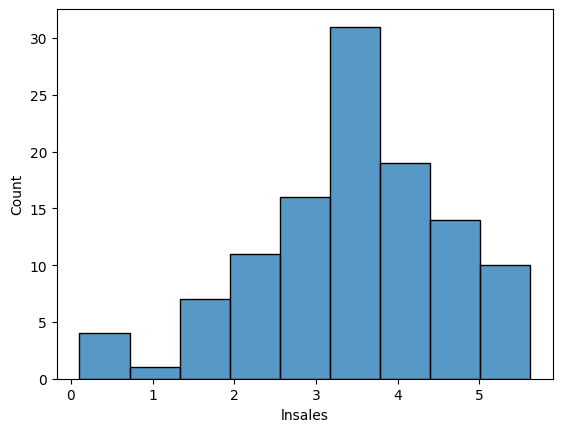

In [ ]:
sns.histplot(x= df['lnsales'])
plt.show()

In [ ]:
# resetting the index
df.reset_index(drop= True, inplace= True)

## Scaling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   manufact  113 non-null    object 
 1   model     113 non-null    object 
 2   sales     113 non-null    float64
 3   resale    113 non-null    float64
 4   type      113 non-null    float64
 5   price     113 non-null    float64
 6   engine_s  113 non-null    float64
 7   horsepow  113 non-null    float64
 8   wheelbas  113 non-null    float64
 9   width     113 non-null    float64
 10  length    113 non-null    float64
 11  curb_wgt  113 non-null    float64
 12  fuel_cap  113 non-null    float64
 13  mpg       113 non-null    float64
 14  lnsales   113 non-null    float64
dtypes: float64(13), object(2)
memory usage: 13.4+ KB


In [ ]:
df[cols].head()

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales
0,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828
1,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673
2,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150
3,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015
4,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933


In [ ]:
X = df[cols].values

In [ ]:
X_prepared = StandardScaler().fit_transform(X)
X[:5, :]

array([[ 16.919,  16.36 ,   0.   ,  21.5  ,   1.8  , 140.   , 101.2  ,
         67.3  , 172.4  ,   2.639,  13.2  ,  28.   ,   2.828],
       [ 39.384,  19.875,   0.   ,  28.4  ,   3.2  , 225.   , 108.1  ,
         70.3  , 192.9  ,   3.517,  17.2  ,  25.   ,   3.673],
       [  8.588,  29.725,   0.   ,  42.   ,   3.5  , 210.   , 114.6  ,
         71.4  , 196.6  ,   3.85 ,  18.   ,  22.   ,   2.15 ],
       [ 20.397,  22.255,   0.   ,  23.99 ,   1.8  , 150.   , 102.6  ,
         68.2  , 178.   ,   2.998,  16.4  ,  27.   ,   3.015],
       [ 18.78 ,  23.555,   0.   ,  33.95 ,   2.8  , 200.   , 108.7  ,
         76.1  , 192.   ,   3.561,  18.5  ,  22.   ,   2.933]])

# ML

## Hierarchical clustering using scipy, dendrogram

In [ ]:
# clustering
Z = linkage(X_prepared, method= 'ward')

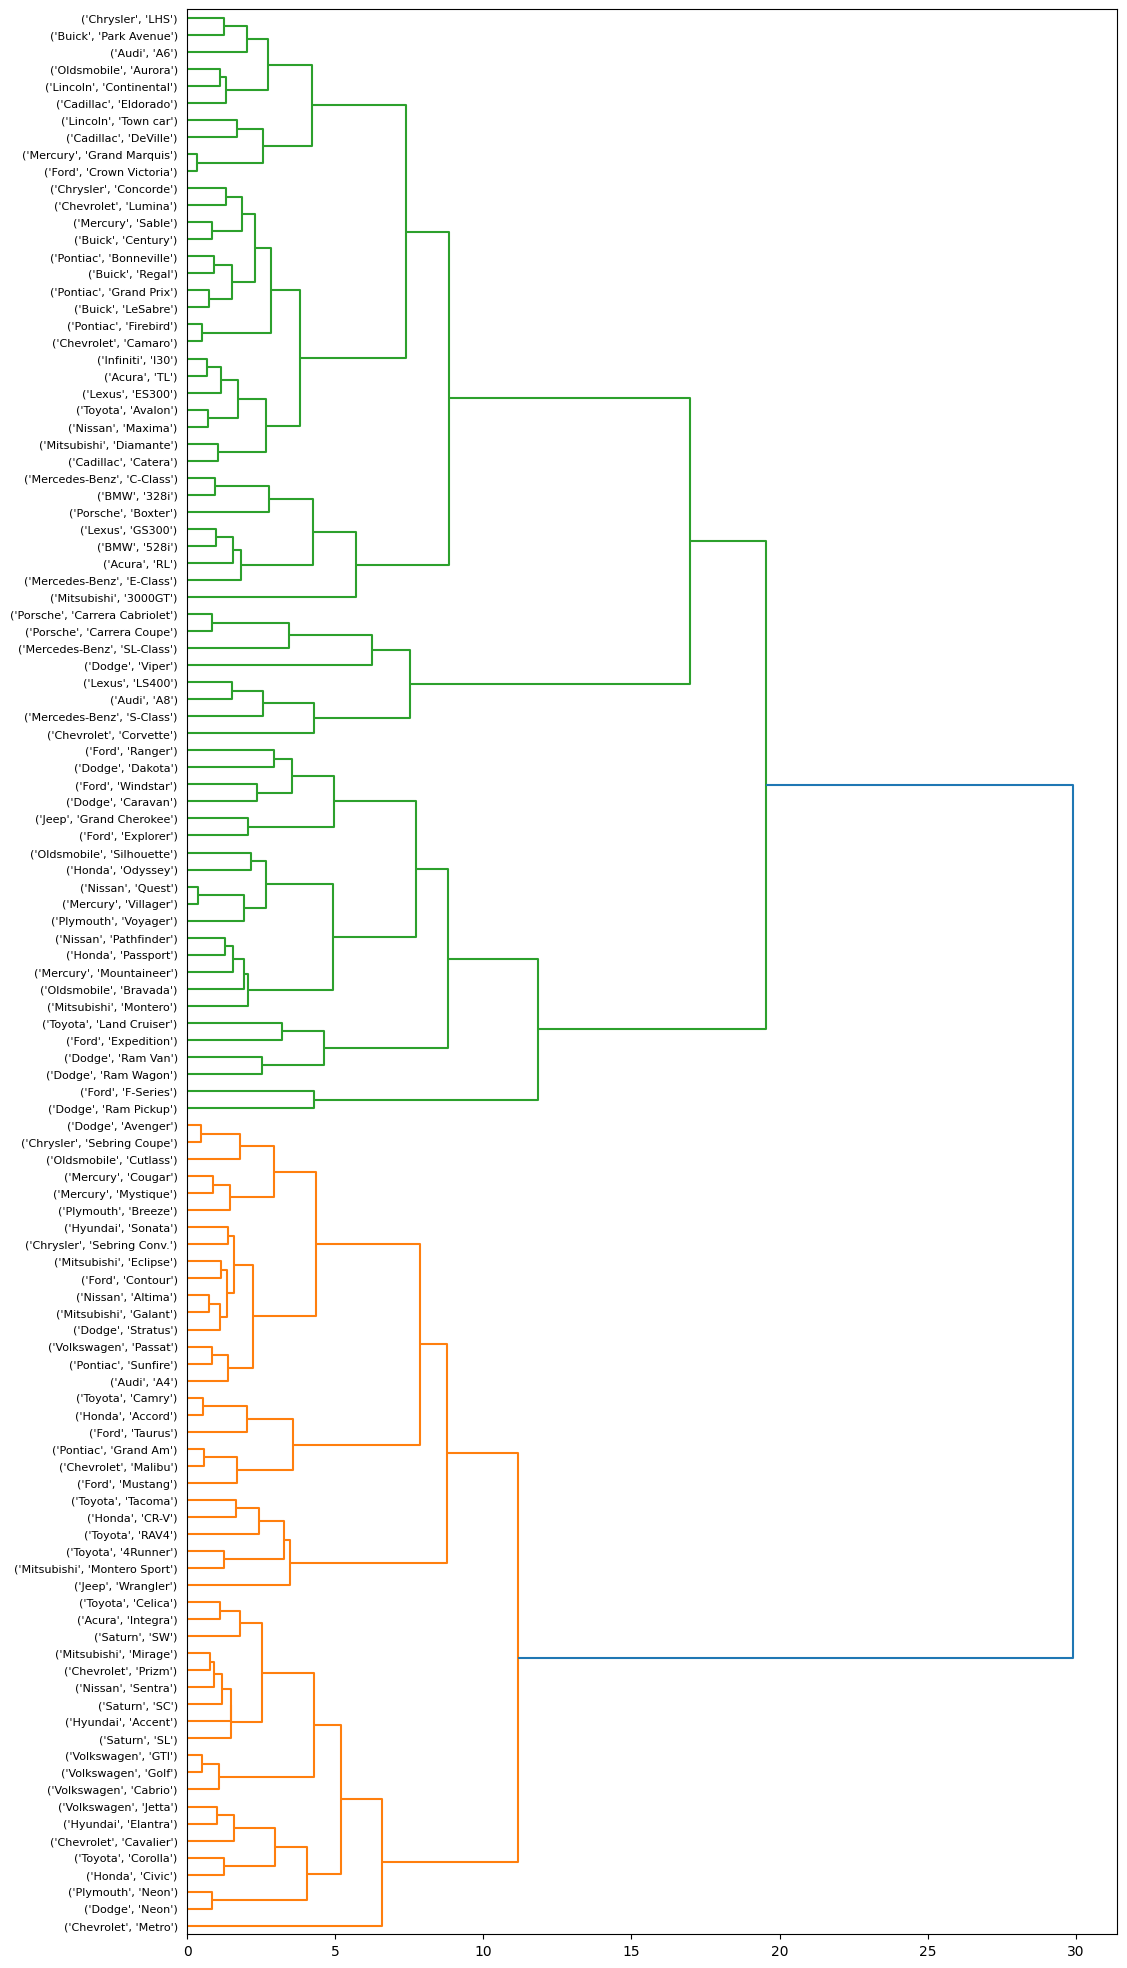

In [ ]:
# plotting
def llf(idx):
  return (df['manufact'][idx], df['model'][idx])

plt.figure(figsize= (12, 25))
dendrogram(Z, orientation= 'right', leaf_font_size= 8, leaf_label_func= llf)
plt.show()

In [ ]:
# decide number of clusters by analysing the dendrogram
k = 6
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 6, 6, 2, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 2, 6, 6, 5, 1, 1,
       2, 2, 6, 6, 1, 2, 2, 5, 3, 4, 4, 4, 4, 2, 2, 2, 6, 4, 4, 4, 4, 3,
       1, 2, 2, 4, 4, 1, 1, 2, 6, 2, 4, 6, 6, 5, 6, 6, 1, 2, 2, 6, 6, 4,
       2, 2, 2, 6, 6, 4, 4, 6, 6, 5, 5, 1, 2, 6, 4, 4, 2, 6, 4, 4, 1, 2,
       4, 2, 2, 6, 6, 6, 6, 5, 5, 1, 1, 1, 1, 2, 6, 1, 2, 2, 2, 4, 1, 1,
       2, 1, 1], dtype=int32)

In [ ]:
df['Cluster1'] = clusters

In [ ]:
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,Cluster1
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,6
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,6
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,2
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,6


In [ ]:
df.groupby('Cluster1')[['horsepow','engine_s','mpg','price']].mean()

,horsepow,engine_s,mpg,price
Cluster1,,,,
1,115.750000,1.840000,30.300000,14.084350
2,151.142857,2.485714,24.892857,18.680429
3,225.000000,4.900000,17.500000,23.197500
4,181.200000,3.485000,19.550000,26.127550
5,321.500000,4.750000,20.750000,66.215625
6,211.571429,3.468571,23.508571,30.441714


## AgglomerativeClustering

In [ ]:
agglom = AgglomerativeClustering(n_clusters= 6)

agglom.fit(X_prepared)

clusters2 = agglom.labels_

In [ ]:
clusters2

array([5, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 0, 0, 3, 5, 5,
       2, 2, 0, 0, 5, 2, 2, 3, 4, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 4,
       5, 2, 2, 1, 1, 5, 5, 2, 0, 2, 1, 0, 0, 3, 0, 0, 5, 2, 2, 0, 0, 1,
       2, 2, 2, 0, 0, 1, 1, 0, 0, 3, 3, 5, 2, 0, 1, 1, 2, 0, 1, 1, 5, 2,
       1, 2, 2, 0, 0, 0, 0, 3, 3, 5, 5, 5, 5, 2, 0, 5, 2, 2, 2, 1, 5, 5,
       2, 5, 5])

In [ ]:
# adding the clusters to the df
df['Cluster2'] = clusters2
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,Cluster1,Cluster2
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,1,5
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,6,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,6,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,2,2
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,6,0


In [ ]:
df.head(10)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,Cluster1,Cluster2
0,Acura,Integra,16.919,16.360,0.0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,1,5
1,Acura,TL,39.384,19.875,0.0,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,6,0
2,Acura,RL,8.588,29.725,0.0,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,6,0
3,Audi,A4,20.397,22.255,0.0,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,2,2
4,Audi,A6,18.780,23.555,0.0,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,6,0
5,Audi,A8,1.380,39.000,0.0,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,0.322,5,3
6,BMW,328i,9.231,28.675,0.0,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,2.223,6,0
7,BMW,528i,17.527,36.125,0.0,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,24.8,2.864,6,0
8,Buick,Century,91.561,12.475,0.0,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,4.517,6,0
9,Buick,Regal,39.350,13.740,0.0,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,3.672,6,0


In [ ]:
df.groupby('Cluster2')[['horsepow','engine_s','mpg','price']].mean()

,horsepow,engine_s,mpg,price
Cluster2,,,,
0,211.571429,3.468571,23.508571,30.441714
1,181.200000,3.485000,19.550000,26.127550
2,151.142857,2.485714,24.892857,18.680429
3,321.500000,4.750000,20.750000,66.215625
4,225.000000,4.900000,17.500000,23.197500
5,115.750000,1.840000,30.300000,14.084350


In [ ]:
# the elements in each clusters are the same but with different cluster labels

## K-means clustering

In [ ]:
kmeans = KMeans(n_clusters= 6, random_state= 42)

kmeans.fit(X_prepared)

KMeans(n_clusters=6, random_state=42)

In [ ]:
clusters3 = kmeans.labels_
clusters3

array([3, 2, 1, 2, 1, 4, 2, 2, 2, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 4, 3, 3,
       2, 2, 2, 1, 3, 2, 2, 4, 5, 1, 5, 0, 0, 2, 2, 0, 1, 0, 0, 5, 0, 5,
       3, 0, 2, 1, 1, 3, 3, 2, 2, 2, 0, 2, 1, 4, 1, 1, 3, 2, 2, 2, 2, 1,
       2, 3, 3, 2, 1, 1, 1, 2, 1, 4, 4, 3, 2, 2, 1, 1, 2, 1, 1, 1, 3, 2,
       1, 2, 2, 2, 2, 1, 2, 4, 4, 3, 3, 3, 3, 0, 2, 3, 3, 3, 2, 1, 3, 3,
       2, 3, 3], dtype=int32)

In [ ]:
df['Cluster3'] = clusters3
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,Cluster1,Cluster2,Cluster3
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,1,5,3
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,6,0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,6,0,1
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,2,2,2
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,6,0,1


In [ ]:
df.head(10)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,Cluster1,Cluster2,Cluster3
0,Acura,Integra,16.919,16.360,0.0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,1,5,3
1,Acura,TL,39.384,19.875,0.0,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,6,0,2
2,Acura,RL,8.588,29.725,0.0,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,6,0,1
3,Audi,A4,20.397,22.255,0.0,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,2,2,2
4,Audi,A6,18.780,23.555,0.0,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,6,0,1
5,Audi,A8,1.380,39.000,0.0,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,0.322,5,3,4
6,BMW,328i,9.231,28.675,0.0,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,2.223,6,0,2
7,BMW,528i,17.527,36.125,0.0,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,24.8,2.864,6,0,2
8,Buick,Century,91.561,12.475,0.0,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,4.517,6,0,2
9,Buick,Regal,39.350,13.740,0.0,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,3.672,6,0,1


In [ ]:
df.groupby('Cluster3')[['horsepow','engine_s','mpg','price']].mean()

,horsepow,engine_s,mpg,price
Cluster3,,,,
0,151.888889,2.877778,22.555556,19.953667
1,211.392857,3.771429,21.285714,31.532500
2,176.025000,2.807500,24.295000,23.316600
3,118.083333,1.883333,29.750000,14.286792
4,321.500000,4.750000,20.750000,66.215625
5,216.250000,4.575000,16.750000,25.276250


In [ ]:
# k-means clusters similarly with slight differences

# Conclusion

In [ ]:
# In conclusion, I have clusters the dataset of cars with unsupervised ML
# techniques: hierarchical and k-means clustering. At first, I did data
# preprocessing, like data type conversion, handling NaN values, and dealing
# with outliers. Then, in ML steps, I clustered the car data by two main
# clustering methods: hierarchical (by scipy dendrogram and sklearn
# AgglomerativeClustering) and sklearn KMeans.

# All methods showed nearly similar results, despite a relatively slight
# difference in k-means clustering. This means while hierarchical methods result
# in identical clustering, k-means clustered a bit differently.

# Overall, by doing this practical clustering project, I have learnt a lot of
# new concepts in unsupervised learning and tried them in practice.

# Thank you!
# 11th August, 2025
# Tashkent.